In [10]:
# propose y

gx = function(xt){
    if (xt>1){
        u = runif(1)
        y = (u<2/3)*(xt+1)+(u => 2/3)*(xt-1)
    } else {
        y = xt+1
    }
    return(y)
}
# update function

update_fxn = function(xt){
    # propose y
    candidate = gx(xt)

    #decide to accept or not
    if (candidate>xt){
        alpha = 0.5*(xt/candidate)^2
    } else{
        alpha = 2*(xt/candidate)^2
    }

    u = runif(1)
    y = (u<alpha) * candidate + (u>=alpha)*xt
    return(y)
}

ERROR: Error in parse(text = x, srcfile = src): '=>' is disabled; set '_R_USE_PIPEBIND_' envvar to a true value to enable it


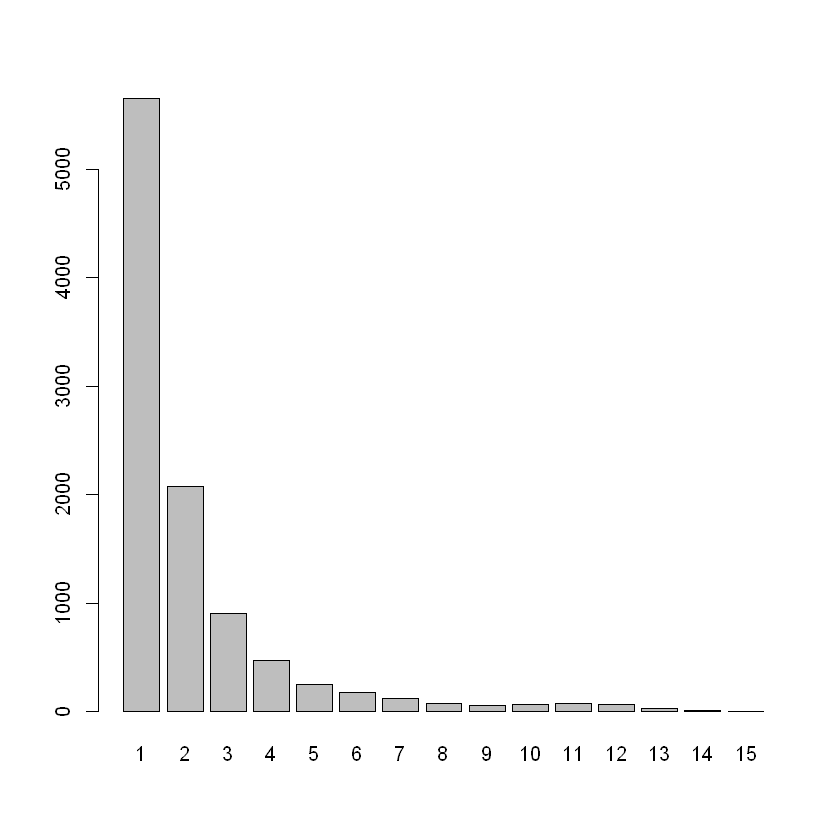

In [14]:
# initial state
x_0 = 1
burn_in = 1000
# burn in
x = x_0
for (i in 1:burn_in){
    x = update_fxn(x)
}
# actual sample
xs = c()
for (i in 1:(10*burn_in)){
    x = update_fxn(x)
    # save state
    xs[i] = x
}
barplot(table(xs))